![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Start your code here!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin
import numpy as np
from scipy.stats import kstest

#determine significance level
alpha=0.01

#read_data
women=pd.read_csv('women_results.csv',parse_dates=['date'])
men=pd.read_csv('men_results.csv',parse_dates=['date'])

#cut-off dates to dates of interest and tornament to FIFA World Cup
men=men.query('date>"2002-01-01" and tournament=="FIFA World Cup"')
#no longer need dates or tournament
men=men[['home_score','away_score']]
men['goals']=men['home_score']+men['away_score']
women=women.query('date>"2002-01-01" and tournament=="FIFA World Cup"')
women=women[['home_score','away_score']]
women['goals']=women['home_score']+women['away_score']


C:\Users\Admin\AppData\Local\Temp\ipykernel_12408\3916876119.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
men.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 25164 to 44352
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   home_score  384 non-null    int64
 1   away_score  384 non-null    int64
 2   goals       384 non-null    int64
dtypes: int64(3)
memory usage: 12.0 KB


In [5]:
men.shape

(384, 3)

In [6]:
#sample both databases
#men_sample_mean=men.sample(n=100,random_state=2002)['score'].mean()
#men_pop_mean=men['score'].mean()
#print(men_pop_mean,men_sample_mean)
#men_pop_std=men['score'].std()
#men_sample_std=men.sample(n=100,random_state=2002)['score'].std()
#print(men_pop_std,men_sample_std)

KstestResult(statistic=0.7580114127352096, pvalue=4.802304083566529e-230, statistic_location=1, statistic_sign=-1)

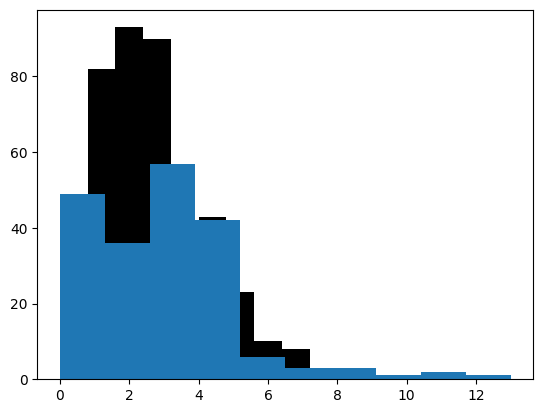

In [7]:
plt.hist(x=men['goals'],color='black')
plt.hist(x=women['goals'])
kstest(men['goals'],'norm')

#data is not normally distributed


In [8]:
#neither the men or women distributions are normal - both are right skewed, the results and unpaired and independent therefore a Wilcoxon-Mann-Whitney test is used.
p_val=np.array(pingouin.mwu(x=women['goals'],y=men['goals'],alternative='greater')['p-val'])[0]
if p_val>alpha:
    result='fail to reject'
else:
    result='reject'
    
print('With P value of '+str(p_val)+', the result is '+result+' the null hypothesis')
result_dict = {"p_val": p_val, "result": result}

With P value of 0.005106609825443641, the result is reject the null hypothesis
